In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy.spatial import ConvexHull
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns
sns.set()
import time

localityFeatures = pd.read_csv('../csv/localityFeatures100.csv', index_col=0)
df = pd.read_csv('../csv/NOW_dataframe_cleaned.csv', index_col=0)
speciesFirstOccurrence = pd.read_csv('../csv/speciesFirstOccurrence.csv', index_col=0)
speciesLastOccurrence = pd.read_csv('../csv/speciesLastOccurrence.csv', index_col=0)
timeUnits = ['old','MN1','MN2','MN3','MN4','MN5','MN6','MN7-8','MN9','MN10','MN11','MN12','MN13','MN14','MN15','MN16','MN17','MQ18','MQ19','recent']

pd.set_option('max_columns',100)

In [2]:
# Logistic regression curve

def sigmoid(c,x):
    return 1/(1 + np.exp(-(c[0]+c[1]*x)))
def sigmoid2(c,x):
    return 1/(1 + np.exp(-(c[0]+c[1]*x[0]+c[2]*x[1])))

In [3]:
# import grid data

gridFeaturesAll = []
for timeUnit in timeUnits[1:19]:
    filename = '../csv/gridFeatures100/gridFeatures_' + timeUnit + '.csv'
    gridFeatures = pd.read_csv(filename, index_col=0)
    gridFeaturesAll.append(gridFeatures)

# SPECIATION VS NPP

In [4]:
count=2
for gridFeatures in gridFeaturesAll[1:-1]:
    gridFeatures['TIMEUNIT'] = timeUnits[count]
    
    gridFeatures.loc[gridFeatures['SIGNIFICANCE FIRST']<0.05,'p<0.05'] = 'yes'
    gridFeatures.loc[gridFeatures['SIGNIFICANCE FIRST']>=0.05,'p<0.05'] = 'no'
    
    count += 1

In [5]:
min_occurrences = 2

gridFeaturesPlotting = pd.DataFrame(columns=gridFeaturesAll[1].columns)
for gridFeatures in gridFeaturesAll[1:-1]:
    gridFeaturesPlotting = gridFeaturesPlotting.append(\
                       gridFeatures.loc[(gridFeatures.loc[:,'HYP1':'HYP3'].sum(axis=1)>min_occurrences) | \
                        (gridFeatures.loc[:,'LOP0':'LOP2'].sum(axis=1)>min_occurrences)].copy(), ignore_index=True)

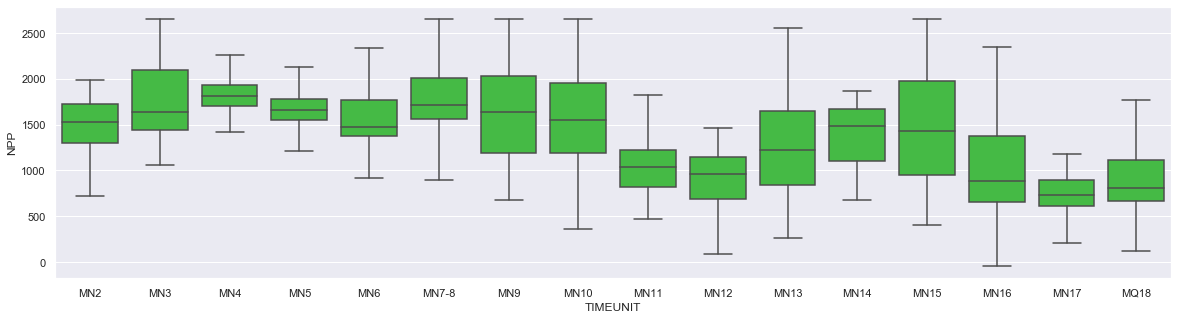

In [6]:
fig, ax = plt.subplots(figsize=(20,5))
sns.boxplot(x='TIMEUNIT', y='NPP', data=gridFeaturesPlotting, order=timeUnits[2:18], fliersize=0, color='limegreen')
#filepath = '../figures/npp100_boxplot.eps'
#plt.savefig(filepath, bbox_inches='tight')
plt.show()

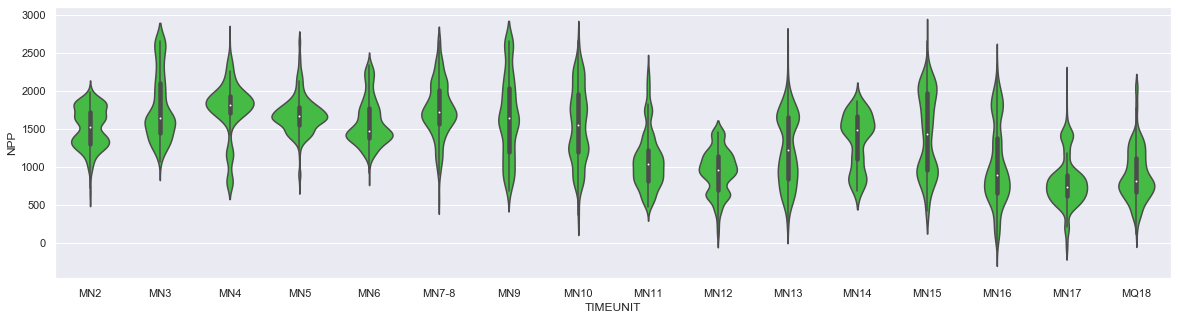

In [7]:
fig, ax = plt.subplots(figsize=(20,5))
sns.violinplot(x='TIMEUNIT', y='NPP', data=gridFeaturesPlotting, order=timeUnits[2:18], fliersize=0, color='limegreen')
#filepath = '../figures/npp100_violinplot.eps'
#plt.savefig(filepath, bbox_inches='tight')
plt.show()

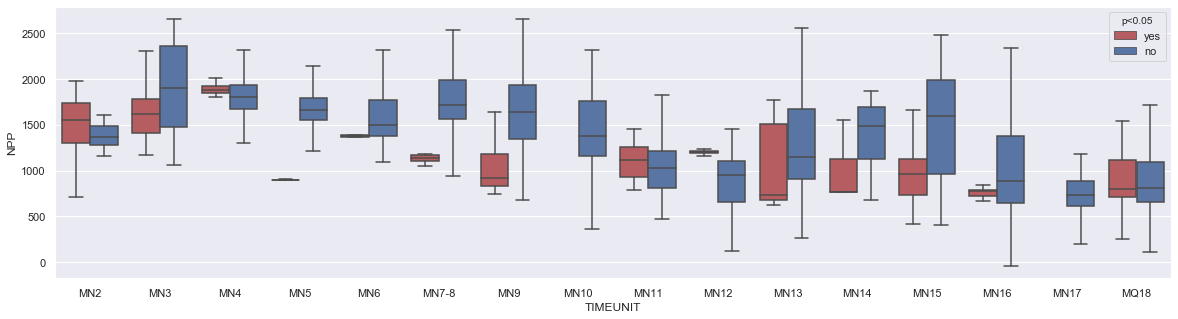

In [8]:
fig, ax = plt.subplots(figsize=(20,5))
my_pal = {'yes': 'r', 'no': 'b'}
sns.boxplot(x='TIMEUNIT', y='NPP', hue='p<0.05', data=gridFeaturesPlotting, order=timeUnits[2:18],\
            dodge=True, fliersize=0, palette=my_pal)
#filepath = '../figures/hotspots_boxplot.eps'
#plt.savefig(filepath, bbox_inches='tight')
plt.show()

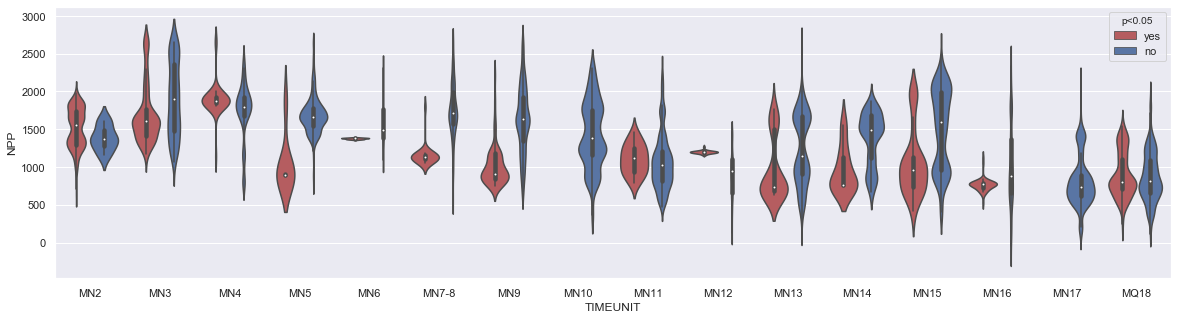

In [9]:
fig, ax = plt.subplots(figsize=(20,5))
my_pal = {'yes': 'r', 'no': 'b'}
sns.violinplot(x='TIMEUNIT', y='NPP', hue='p<0.05', data=gridFeaturesPlotting, order=timeUnits[2:18],\
            dodge=True, palette=my_pal, scale_hue=True)
plt.show()

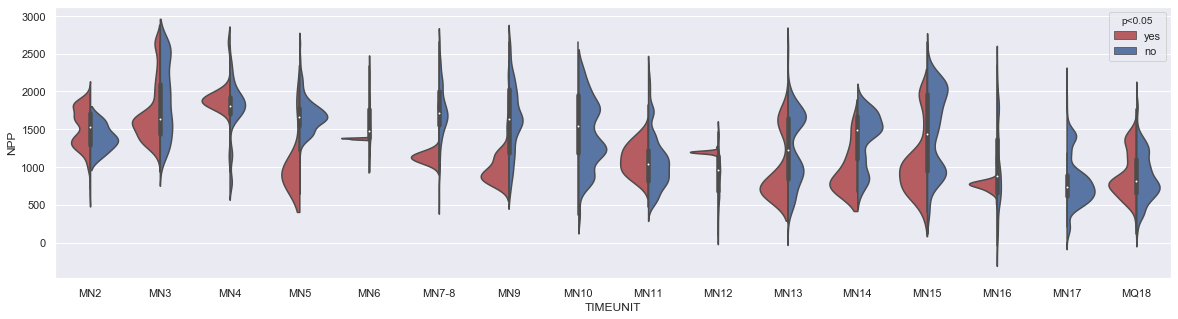

In [10]:
fig, ax = plt.subplots(figsize=(20,5))
my_pal = {'yes': 'r', 'no': 'b'}
sns.violinplot(x='TIMEUNIT', y='NPP', hue='p<0.05', data=gridFeaturesPlotting, order=timeUnits[2:18],\
            dodge=True, split=True, palette=my_pal)
plt.show()

# EXTINCTION VS NPP

In [11]:
count=2
for gridFeatures in gridFeaturesAll[1:-1]:
    gridFeatures['TIMEUNIT'] = timeUnits[count]        
    gridFeatures.loc[gridFeatures['SIGNIFICANCE LAST']<0.05,'p<0.05'] = 'yes'
    gridFeatures.loc[gridFeatures['SIGNIFICANCE LAST']>=0.05,'p<0.05'] = 'no'    
    count += 1

min_occurrences = 2
gridFeaturesPlotting = pd.DataFrame(columns=gridFeaturesAll[1].columns)
for gridFeatures in gridFeaturesAll[1:-1]:
    gridFeaturesPlotting = gridFeaturesPlotting.append(\
                       gridFeatures.loc[(gridFeatures.loc[:,'HYP1':'HYP3'].sum(axis=1)>min_occurrences) | \
                        (gridFeatures.loc[:,'LOP0':'LOP2'].sum(axis=1)>min_occurrences)].copy(), ignore_index=True)

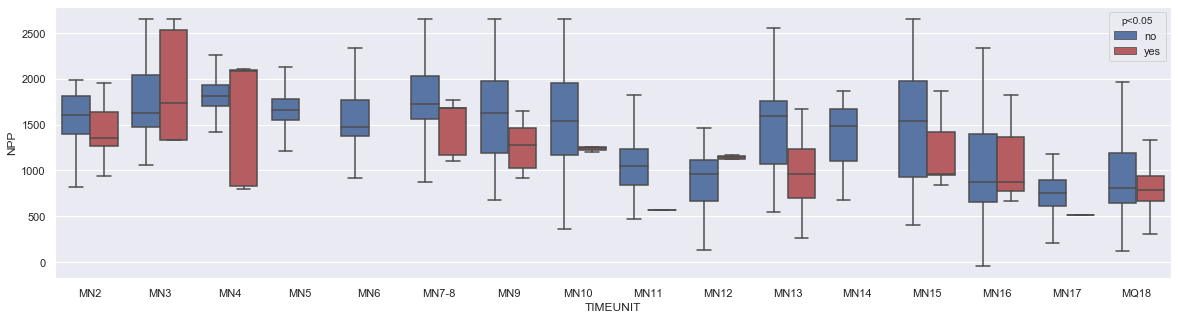

In [12]:
fig, ax = plt.subplots(figsize=(20,5))
my_pal = {'yes': 'r', 'no': 'b'}
sns.boxplot(x='TIMEUNIT', y='NPP', hue='p<0.05', data=gridFeaturesPlotting, order=timeUnits[2:18],\
            dodge=True, fliersize=0, palette=my_pal)
#filepath = '../figures/extinction_boxplot.eps'
#plt.savefig(filepath, bbox_inches='tight')
plt.show()

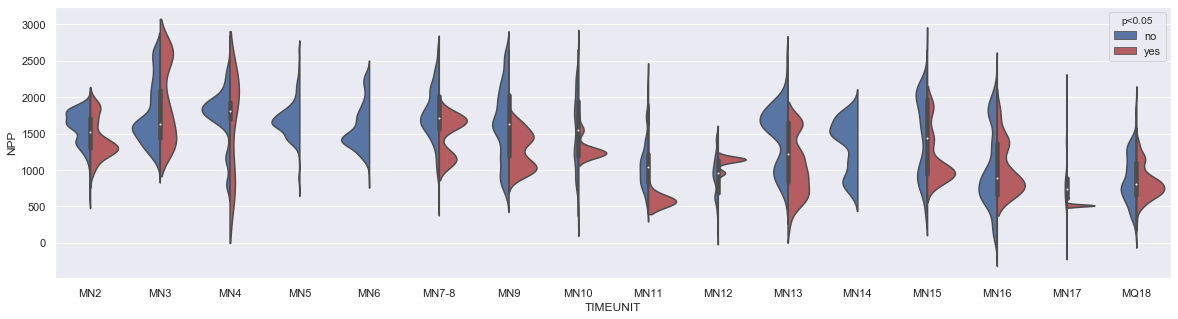

In [13]:
fig, ax = plt.subplots(figsize=(20,5))
my_pal = {'yes': 'r', 'no': 'b'}
sns.violinplot(x='TIMEUNIT', y='NPP', hue='p<0.05', data=gridFeaturesPlotting, order=timeUnits[2:18],\
            dodge=True, split=True, palette=my_pal)
plt.show()

# EMIGRATION VS NPP

In [14]:
count=2
for gridFeatures in gridFeaturesAll[1:-1]:
    gridFeatures['TIMEUNIT'] = timeUnits[count]
    gridFeatures.loc[gridFeatures['SIGNIFICANCE EMIGRATION']<0.05,'p<0.05'] = 'yes'
    gridFeatures.loc[gridFeatures['SIGNIFICANCE EMIGRATION']>=0.05,'p<0.05'] = 'no'
    
    count += 1

In [15]:
min_occurrences = 2

gridFeaturesPlotting = pd.DataFrame(columns=gridFeaturesAll[1].columns)
for gridFeatures in gridFeaturesAll[1:-1]:
    gridFeaturesPlotting = gridFeaturesPlotting.append(\
                       gridFeatures.loc[(gridFeatures.loc[:,'HYP1':'HYP3'].sum(axis=1)>min_occurrences) | \
                        (gridFeatures.loc[:,'LOP0':'LOP2'].sum(axis=1)>min_occurrences)].copy(), ignore_index=True)

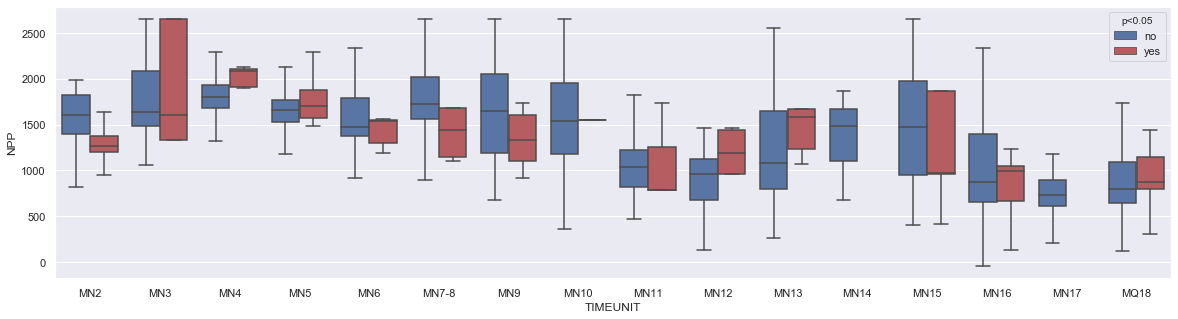

In [16]:
fig, ax = plt.subplots(figsize=(20,5))
my_pal = {'yes': 'r', 'no': 'b'}
sns.boxplot(x='TIMEUNIT', y='NPP', hue='p<0.05', data=gridFeaturesPlotting, order=timeUnits[2:18],\
            dodge=True, fliersize=0, palette=my_pal)
#filepath = '../figures/emigration_boxplot.eps'
#plt.savefig(filepath, bbox_inches='tight')
plt.show()

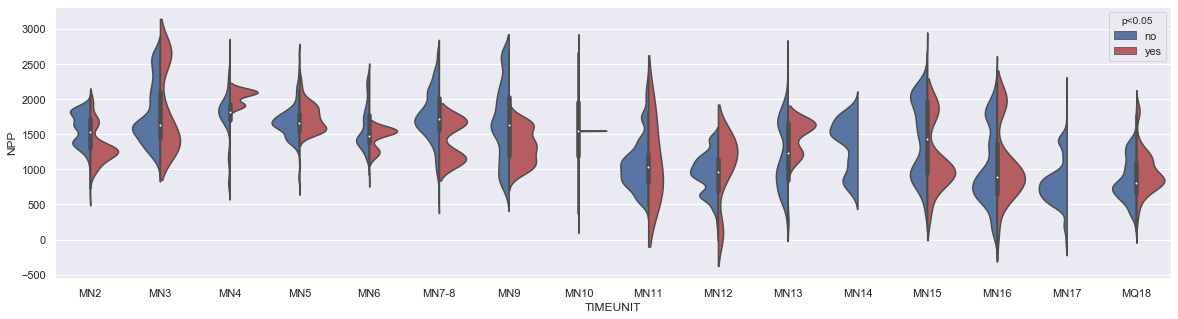

In [17]:
fig, ax = plt.subplots(figsize=(20,5))
my_pal = {'yes': 'r', 'no': 'b'}
sns.violinplot(x='TIMEUNIT', y='NPP', hue='p<0.05', data=gridFeaturesPlotting, order=timeUnits[2:18],\
            dodge=True, split=True, fliersize=0, palette=my_pal)
plt.show()

# IMMIGRATION VS NPP

In [18]:
count=2
for gridFeatures in gridFeaturesAll[1:-1]:
    gridFeatures['TIMEUNIT'] = timeUnits[count]
    gridFeatures.loc[gridFeatures['SIGNIFICANCE IMMIGRATION']<0.05,'p<0.05'] = 'yes'
    gridFeatures.loc[gridFeatures['SIGNIFICANCE IMMIGRATION']>=0.05,'p<0.05'] = 'no'
    
    count += 1

In [19]:
min_occurrences = 2

gridFeaturesPlotting = pd.DataFrame(columns=gridFeaturesAll[1].columns)
for gridFeatures in gridFeaturesAll[1:-1]:
    gridFeaturesPlotting = gridFeaturesPlotting.append(\
                       gridFeatures.loc[(gridFeatures.loc[:,'HYP1':'HYP3'].sum(axis=1)>min_occurrences) | \
                        (gridFeatures.loc[:,'LOP0':'LOP2'].sum(axis=1)>min_occurrences)].copy(), ignore_index=True)

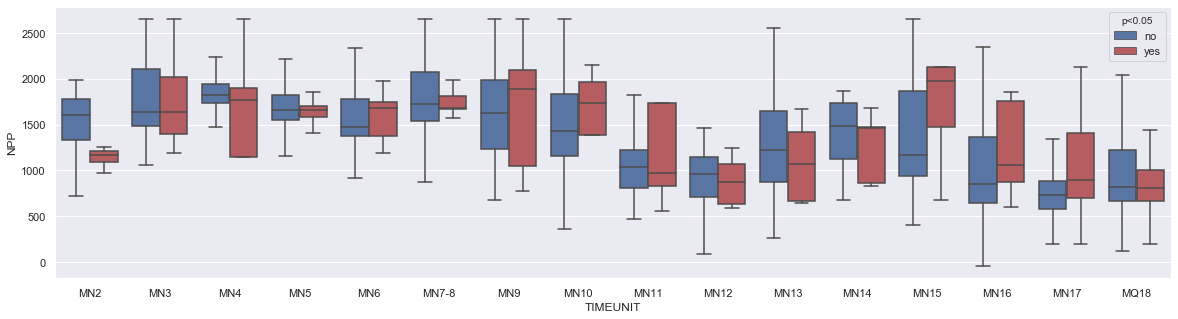

In [20]:
fig, ax = plt.subplots(figsize=(20,5))
my_pal = {'yes': 'r', 'no': 'b'}
sns.boxplot(x='TIMEUNIT', y='NPP', hue='p<0.05', data=gridFeaturesPlotting, order=timeUnits[2:18],\
            dodge=True, fliersize=0, palette=my_pal)
#filepath = '../figures/immigration_boxplot.eps'
#plt.savefig(filepath, bbox_inches='tight')
plt.show()

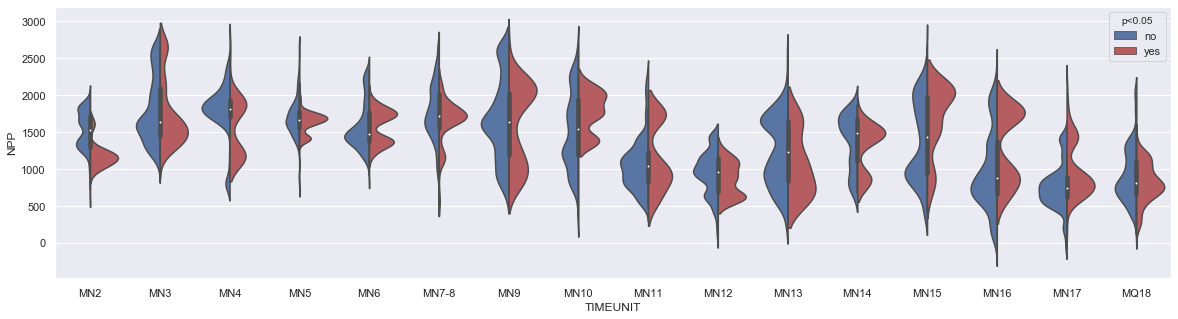

In [21]:
fig, ax = plt.subplots(figsize=(20,5))
my_pal = {'yes': 'r', 'no': 'b'}
sns.violinplot(x='TIMEUNIT', y='NPP', hue='p<0.05', data=gridFeaturesPlotting, order=timeUnits[2:18],\
            dodge=True, split=True, fliersize=0, palette=my_pal)
plt.show()

# HOTSPOTS

In [22]:
timeBoundaries = [23,21.7,19.5,17.2,16.4,14.2,12.85,11.2,9.9,8.9,7.6,7.1,5.3,5,3.55,2.5,1.9,0.85,0.01,0]

In [23]:
# only including species that were "born" in or after MN1 within the study area
allowed_species = []
for timeUnit in timeUnits[1:-1]:
    all_species = speciesFirstOccurrence.loc[speciesFirstOccurrence[timeUnit]==1].index
    for species in all_species:
        occurrences = df[(df['ID']==species) & (df['TIMEUNIT']==timeUnit)]
        if ( occurrences.loc[(occurrences['LAT']>35) & (occurrences['LONG']>-25) \
                           & (occurrences['LONG']<40)].shape[0] ) > 0:
            allowed_species.append(species)

In [24]:
len(allowed_species)

2491

In [25]:
# use hull.volume (not hull.area = perimeter length) to get area of 2D convex hull
points = np.array([[0,0], [1,0], [1,1], [0,1]])
hull = ConvexHull(points)
print(hull.area)
print(hull.volume)

4.0
1.0


In [26]:
speciesLifespan = pd.DataFrame(index=allowed_species,columns=['GENUS','SPECIES','LIFESPAN (time units)',\
                                                              'LIFESPAN (My)'])
speciesRangeHull = pd.DataFrame(index=allowed_species,columns=timeUnits[1:19])
speciesRangeBox = pd.DataFrame(index=allowed_species,columns=timeUnits[1:19])

tic = time.clock()
for species in speciesLifespan.index:
    timeUnitFirst = timeUnits.index(speciesFirstOccurrence.loc[species].idxmax())
    timeUnitLast = timeUnits.index(speciesLastOccurrence.loc[species].idxmax())    
    speciesLifespan.loc[species,'GENUS'] = df.loc[df['ID']==species,'GENUS'].unique()[0]
    speciesLifespan.loc[species,'SPECIES'] = df.loc[df['ID']==species,'SPECIES'].unique()[0]
    speciesLifespan.loc[species,'LIFESPAN (time units)'] = timeUnitLast - timeUnitFirst + 1
    speciesLifespan.loc[species,'LIFESPAN (My)'] = timeBoundaries[timeUnitFirst-1] - timeBoundaries[timeUnitLast]
    for timeUnit in timeUnits[timeUnitFirst:timeUnitLast+1]:
        occurrences = df[(df['TIMEUNIT']==timeUnit) & (df['ID']==species)]        
        
        # simple "box" area using extreme coordinates
        max_west = occurrences['LONG'].min()
        max_east = occurrences['LONG'].max()
        max_north = occurrences['LAT'].max()
        max_south = occurrences['LAT'].min()
        area = (max_east-max_west) * (max_north-max_south)
        speciesRangeBox.loc[species,timeUnit] = area
        
        # area by convex hull (calculate where possible)
        points = occurrences[['LONG','LAT']]
        try:            
            hull = ConvexHull(points)
            speciesRangeHull.loc[species,timeUnit] = hull.volume
        except:
            # not enough (3) unique occurrences (points really close by may not allow convex hull to be calculated)
            if points.shape[0]>0:
                speciesRangeHull.loc[species,timeUnit] = 0
            # no occurrences
            else:
                speciesRangeHull.loc[species,timeUnit] = np.nan

toc = time.clock()
print('Time elapsed: ' + str((toc-tic)/60) + ' minutes.')         
display(speciesLifespan.head())
display(speciesRangeHull.head(10))
display(speciesRangeBox.head(10))

Time elapsed: 1.573287316666667 minutes.


,GENUS,SPECIES,LIFESPAN (time units),LIFESPAN (My)
24,Heteroxerus,grivensis,10,15.4
53,Vasseuromys,bacchius,5,8.8
523,Piezodus,tomerdingensis,2,3.5
609,Steneofiber,eseri,10,15.4
815,Vasseuromys,autolensis,2,3.5


,MN1,MN2,MN3,MN4,MN5,MN6,MN7-8,MN9,MN10,MN11,MN12,MN13,MN14,MN15,MN16,MN17,MQ18,MQ19,recent
24,0,NaN,NaN,0,3.6645,29.6221,15.7674,0.714027,7.68523,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53,0,0.794961,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
523,0.000581985,25.6421,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
609,0,174.232,154.89,0,NaN,0,0,NaN,20.9393,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
815,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1067,0,11.0383,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1244,0,39.8077,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1295,0.00600094,43.2479,28.5397,56.5536,8.40663,1.21511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1504,0,0.45137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1558,0,11.3746,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,MN1,MN2,MN3,MN4,MN5,MN6,MN7-8,MN9,MN10,MN11,MN12,MN13,MN14,MN15,MN16,MN17,MQ18,MQ19,recent
24,0,NaN,NaN,0,16.427,196.444,41.4917,16.4407,45.1758,1.14718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53,0,2.59948,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
523,0.0266432,108.492,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
609,0,323.832,343.998,2.01667e-05,NaN,0,0,NaN,92.1113,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
815,1.38805,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1067,0,31.8175,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1244,0,120.487,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1295,0.0270302,86.9143,86.1294,164.004,19.1226,4.42647,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1504,0,3.28538,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1558,0,85.2808,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
print('Average species lifespan: ' + str(speciesLifespan['LIFESPAN (time units)'].mean()) + ' time units.')
print('Average species lifespan: ' + str(speciesLifespan['LIFESPAN (My)'].mean()) + ' million years.')
print()
print('Average species lifespan (without singletons): ' + str(speciesLifespan.loc[\
                  speciesLifespan['LIFESPAN (time units)']>1, 'LIFESPAN (time units)'].mean()) + ' time units.')
print('Average species lifespan (without singletons): ' + str(speciesLifespan.loc[\
                  speciesLifespan['LIFESPAN (time units)']>1, 'LIFESPAN (My)'].mean()) + ' million years.')

Average species lifespan: 2.323564833400241 time units.
Average species lifespan: 2.991802488960308 million years.

Average species lifespan (without singletons): 3.518716577540107 time units.
Average species lifespan (without singletons): 4.45100076394196 million years.


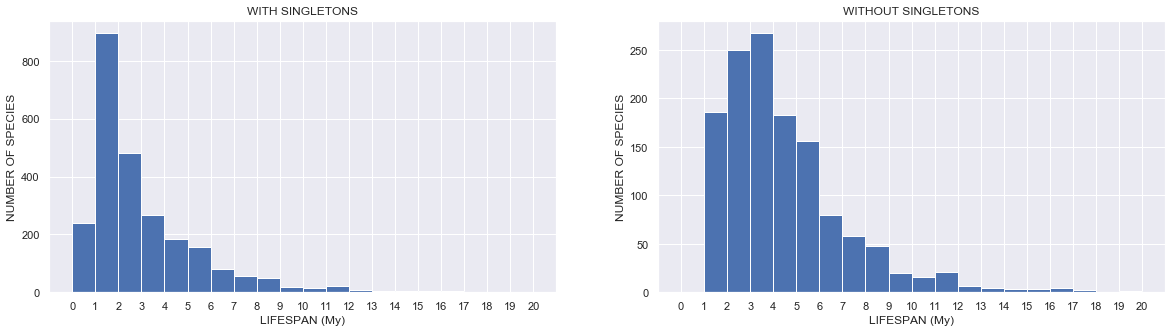

In [28]:
x = np.linspace(0,20,21)
fig, ax = plt.subplots(1,2,figsize=(20,5))
ax[0].hist(speciesLifespan['LIFESPAN (My)'], bins=x)
ax[0].set_xlabel('LIFESPAN (My)')
ax[0].set_ylabel('NUMBER OF SPECIES')
ax[0].set_title('WITH SINGLETONS')
ax[0].set_xticks(x)
ax[1].hist(speciesLifespan.loc[speciesLifespan['LIFESPAN (time units)']>1, 'LIFESPAN (My)'], bins=x)
ax[1].set_xlabel('LIFESPAN (My)')
ax[1].set_ylabel('NUMBER OF SPECIES')
ax[1].set_title('WITHOUT SINGLETONS')
ax[1].set_xticks(x)
plt.show()

In [29]:
# ADD INFO FOR EACH SPECIES ON THEIR OCCURRENCES IN HOTSPOTS
for timeUnit in timeUnits[1:-1]:
    # determine hotspots and hot spot species
    hotspots = localityFeatures[(localityFeatures['TIMEUNIT']==timeUnit) & \
                                (localityFeatures['SIGNIFICANCE FIRST']<0.05)]
    hotspot_species = set(df.loc[df['LIDNUM'].isin(hotspots.index),'ID'].unique())
    hotspot_species = hotspot_species.intersection(allowed_species)
    biodiversity_hotspots = localityFeatures[(localityFeatures['TIMEUNIT']==timeUnit) & \
                     (localityFeatures['SIGNIFICANCE FIRST']<0.05) & (localityFeatures['SIGNIFICANCE LAST']>0.95)]
    biodiversity_hotspot_species = set(df.loc[df['LIDNUM'].isin(biodiversity_hotspots.index),'ID'].unique())
    biodiversity_hotspot_species = biodiversity_hotspot_species.intersection(allowed_species)
    
    # determine info on first occurrences
    first_occurring_species = speciesFirstOccurrence.loc[speciesFirstOccurrence[timeUnit]==1].index
    species_with_first_occurrence_in_hotspot = hotspot_species.intersection(first_occurring_species)
    species_with_first_occurrence_in_biodiversity_hotspot = \
                biodiversity_hotspot_species.intersection(first_occurring_species)
    
    # import info to speciesLifespan dataframe
    speciesLifespan.loc[species_with_first_occurrence_in_hotspot,'FIRST OCCURRENCE IN HOTSPOT'] = 'yes'
    speciesLifespan.loc[hotspot_species,'ANY OCCURRENCE IN HOTSPOT'] = 'yes'        
    
    speciesLifespan.loc[species_with_first_occurrence_in_biodiversity_hotspot,\
                        'FIRST OCCURRENCE IN BIODIVERSITY HOTSPOT'] = 'yes'    
    speciesLifespan.loc[biodiversity_hotspot_species,'ANY OCCURRENCE IN BIODIVERSITY HOTSPOT'] = 'yes'

speciesLifespan.loc[speciesLifespan['FIRST OCCURRENCE IN HOTSPOT'].isnull(), 'FIRST OCCURRENCE IN HOTSPOT'] = 'no'
speciesLifespan.loc[speciesLifespan['ANY OCCURRENCE IN HOTSPOT'].isnull(), 'ANY OCCURRENCE IN HOTSPOT'] = 'no'
speciesLifespan.loc[speciesLifespan['FIRST OCCURRENCE IN BIODIVERSITY HOTSPOT'].isnull(), \
                    'FIRST OCCURRENCE IN BIODIVERSITY HOTSPOT'] = 'no'
speciesLifespan.loc[speciesLifespan['ANY OCCURRENCE IN BIODIVERSITY HOTSPOT'].isnull(), \
                    'ANY OCCURRENCE IN BIODIVERSITY HOTSPOT'] = 'no'

speciesLifespan.loc[(speciesLifespan['FIRST OCCURRENCE IN HOTSPOT']=='no') & \
                    (speciesLifespan['ANY OCCURRENCE IN HOTSPOT']=='yes'), 'OLD OCCURRENCE (ONLY) IN HOTSPOT'] = 'yes'
speciesLifespan.loc[speciesLifespan['OLD OCCURRENCE (ONLY) IN HOTSPOT'].isnull(), \
                    'OLD OCCURRENCE (ONLY) IN HOTSPOT'] = 'no'
speciesLifespan.loc[(speciesLifespan['FIRST OCCURRENCE IN BIODIVERSITY HOTSPOT']=='no') & \
                    (speciesLifespan['ANY OCCURRENCE IN BIODIVERSITY HOTSPOT']=='yes'), \
                    'OLD OCCURRENCE (ONLY) IN BIODIVERSITY HOTSPOT'] = 'yes'
speciesLifespan.loc[speciesLifespan['OLD OCCURRENCE (ONLY) IN BIODIVERSITY HOTSPOT'].isnull(), \
                    'OLD OCCURRENCE (ONLY) IN BIODIVERSITY HOTSPOT'] = 'no'

speciesLifespan.head()

,GENUS,SPECIES,LIFESPAN (time units),LIFESPAN (My),FIRST OCCURRENCE IN HOTSPOT,ANY OCCURRENCE IN HOTSPOT,FIRST OCCURRENCE IN BIODIVERSITY HOTSPOT,ANY OCCURRENCE IN BIODIVERSITY HOTSPOT,OLD OCCURRENCE (ONLY) IN HOTSPOT,OLD OCCURRENCE (ONLY) IN BIODIVERSITY HOTSPOT
24,Heteroxerus,grivensis,10,15.4,no,yes,no,yes,yes,yes
53,Vasseuromys,bacchius,5,8.8,no,yes,no,no,yes,no
523,Piezodus,tomerdingensis,2,3.5,no,yes,no,yes,yes,yes
609,Steneofiber,eseri,10,15.4,no,yes,no,yes,yes,yes
815,Vasseuromys,autolensis,2,3.5,no,yes,no,no,yes,no


## FIRST OCCURRENCES

In [30]:
print('Average lifespan of species that do not have a first occurrence in a hotspot: ' \
      + str(speciesLifespan.loc[speciesLifespan['FIRST OCCURRENCE IN HOTSPOT']=='no',\
        'LIFESPAN (time units)'].mean()) + ' time units.')
print('Average lifespan of species that have a first occurrence in a hotspot: ' \
      + str(speciesLifespan.loc[speciesLifespan['FIRST OCCURRENCE IN HOTSPOT']=='yes',\
        'LIFESPAN (time units)'].mean()) + ' time units.')
print('Average lifespan of species that have a first occurrence in a biodiversity hotspot: ' \
      + str(speciesLifespan.loc[speciesLifespan['FIRST OCCURRENCE IN BIODIVERSITY HOTSPOT']=='yes',\
        'LIFESPAN (time units)'].mean()) + ' time units.')
print()

print('Average lifespan of species that do not have a first occurrence in a hotspot: ' \
      + str(speciesLifespan.loc[speciesLifespan['FIRST OCCURRENCE IN HOTSPOT']=='no',\
        'LIFESPAN (My)'].mean()) + ' million years.')
print('Average lifespan of species that have a first occurrence in a hotspot: ' \
      + str(speciesLifespan.loc[speciesLifespan['FIRST OCCURRENCE IN HOTSPOT']=='yes',\
        'LIFESPAN (My)'].mean()) + ' million years.')
print('Average lifespan of species that have a first occurrence in a biodiversity hotspot: ' \
      + str(speciesLifespan.loc[speciesLifespan['FIRST OCCURRENCE IN BIODIVERSITY HOTSPOT']=='yes',\
        'LIFESPAN (My)'].mean()) + ' million years.')

Average lifespan of species that do not have a first occurrence in a hotspot: 2.1252045826513912 time units.
Average lifespan of species that have a first occurrence in a hotspot: 2.5145784081954297 time units.
Average lifespan of species that have a first occurrence in a biodiversity hotspot: 3.1572700296735907 time units.

Average lifespan of species that do not have a first occurrence in a hotspot: 2.5593862520458615 million years.
Average lifespan of species that have a first occurrence in a hotspot: 3.408203309692703 million years.
Average lifespan of species that have a first occurrence in a biodiversity hotspot: 4.179020771513357 million years.


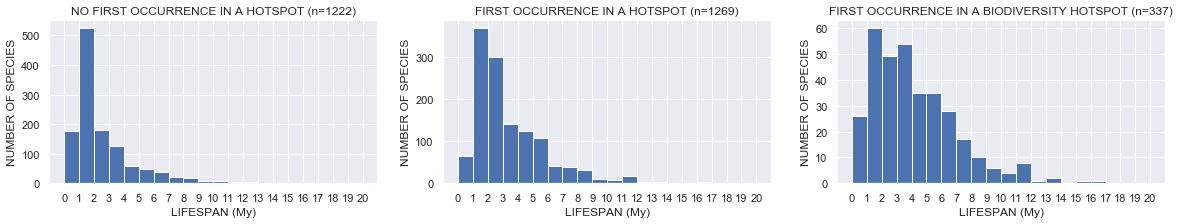

In [31]:
x = np.linspace(0,20,21)
fig, ax = plt.subplots(1,3,figsize=(20,3))
ax[0].hist(speciesLifespan.loc[speciesLifespan['FIRST OCCURRENCE IN HOTSPOT']=='no','LIFESPAN (My)'], bins=x)
ax[0].set_xlabel('LIFESPAN (My)')
ax[0].set_ylabel('NUMBER OF SPECIES')
ax[0].set_title('NO FIRST OCCURRENCE IN A HOTSPOT (n=' +\
        str(speciesLifespan.loc[speciesLifespan['FIRST OCCURRENCE IN HOTSPOT']=='no','LIFESPAN (My)'].shape[0]) +')')
ax[0].set_xticks(x)

ax[1].hist(speciesLifespan.loc[speciesLifespan['FIRST OCCURRENCE IN HOTSPOT']=='yes','LIFESPAN (My)'], bins=x)
ax[1].set_xlabel('LIFESPAN (My)')
ax[1].set_ylabel('NUMBER OF SPECIES')
ax[1].set_title('FIRST OCCURRENCE IN A HOTSPOT (n=' +\
    str(speciesLifespan.loc[speciesLifespan['FIRST OCCURRENCE IN HOTSPOT']=='yes','LIFESPAN (My)'].shape[0]) +')')
ax[1].set_xticks(x)

ax[2].hist(speciesLifespan.loc[speciesLifespan['FIRST OCCURRENCE IN BIODIVERSITY HOTSPOT']=='yes','LIFESPAN (My)'],\
           bins=x)
ax[2].set_xlabel('LIFESPAN (My)')
ax[2].set_ylabel('NUMBER OF SPECIES')
ax[2].set_title('FIRST OCCURRENCE IN A BIODIVERSITY HOTSPOT (n=' +\
        str(speciesLifespan.loc[speciesLifespan['FIRST OCCURRENCE IN BIODIVERSITY HOTSPOT']=='yes',\
        'LIFESPAN (My)'].shape[0]) +')')
ax[2].set_xticks(x)

plt.show()

In [32]:
print('SINGLETONS REMOVED')
print()
print('Average lifespan of species that do not have a first occurrence in a hotspot: ' \
      + str(speciesLifespan.loc[(speciesLifespan['FIRST OCCURRENCE IN HOTSPOT']=='no') & \
         (speciesLifespan['LIFESPAN (time units)']>1), 'LIFESPAN (time units)'].mean()) + ' time units.')
print('Average lifespan of species that have a first occurrence in a hotspot: ' \
      + str(speciesLifespan.loc[(speciesLifespan['FIRST OCCURRENCE IN HOTSPOT']=='yes') & \
         (speciesLifespan['LIFESPAN (time units)']>1), 'LIFESPAN (time units)'].mean()) + ' time units.')
print('Average lifespan of species that have a first occurrence in a biodiversity hotspot: ' \
      + str(speciesLifespan.loc[(speciesLifespan['FIRST OCCURRENCE IN BIODIVERSITY HOTSPOT']=='yes') & \
         (speciesLifespan['LIFESPAN (time units)']>1), 'LIFESPAN (time units)'].mean()) + ' time units.')
print()

print('Average lifespan of species that do not have a first occurrence in a hotspot: ' \
      + str(speciesLifespan.loc[(speciesLifespan['FIRST OCCURRENCE IN HOTSPOT']=='no') & \
         (speciesLifespan['LIFESPAN (time units)']>1), 'LIFESPAN (My)'].mean()) + ' million years.')
print('Average lifespan of species that have a first occurrence in a hotspot: ' \
      + str(speciesLifespan.loc[(speciesLifespan['FIRST OCCURRENCE IN HOTSPOT']=='yes') & \
         (speciesLifespan['LIFESPAN (time units)']>1), 'LIFESPAN (My)'].mean()) + ' million years.')
print('Average lifespan of species that have a first occurrence in a biodiversity hotspot: ' \
      + str(speciesLifespan.loc[(speciesLifespan['FIRST OCCURRENCE IN BIODIVERSITY HOTSPOT']=='yes') & \
         (speciesLifespan['LIFESPAN (time units)']>1), 'LIFESPAN (My)'].mean()) + ' million years.')

SINGLETONS REMOVED

Average lifespan of species that do not have a first occurrence in a hotspot: 3.5183150183150182 time units.
Average lifespan of species that have a first occurrence in a hotspot: 3.5190039318479687 time units.
Average lifespan of species that have a first occurrence in a biodiversity hotspot: 3.550877192982456 time units.

Average lifespan of species that do not have a first occurrence in a hotspot: 4.220238095238068 million years.
Average lifespan of species that have a first occurrence in a hotspot: 4.616133682830917 million years.
Average lifespan of species that have a first occurrence in a biodiversity hotspot: 4.730807017543868 million years.


WITHOUT SINGLETONS


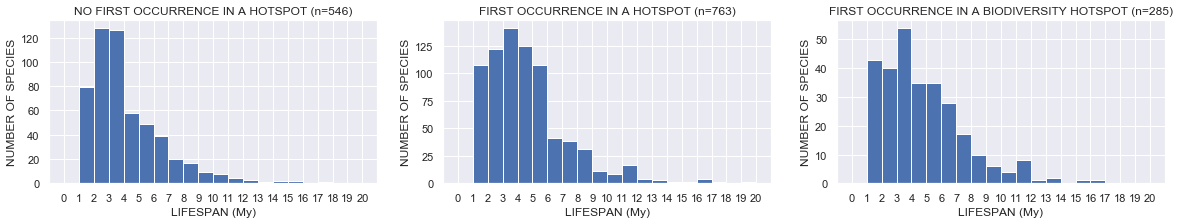

In [33]:
x = np.linspace(0,20,21)
print('WITHOUT SINGLETONS')
fig, ax = plt.subplots(1,3,figsize=(20,3))
ax[0].hist(speciesLifespan.loc[(speciesLifespan['FIRST OCCURRENCE IN HOTSPOT']=='no') & \
                       (speciesLifespan['LIFESPAN (time units)']>1),'LIFESPAN (My)'], bins=x)
ax[0].set_xlabel('LIFESPAN (My)')
ax[0].set_ylabel('NUMBER OF SPECIES')
ax[0].set_title('NO FIRST OCCURRENCE IN A HOTSPOT (n=' +\
        str(speciesLifespan.loc[(speciesLifespan['FIRST OCCURRENCE IN HOTSPOT']=='no') & \
                       (speciesLifespan['LIFESPAN (time units)']>1),'LIFESPAN (My)'].shape[0]) +')')
ax[0].set_xticks(x)

ax[1].hist(speciesLifespan.loc[(speciesLifespan['FIRST OCCURRENCE IN HOTSPOT']=='yes') & \
                       (speciesLifespan['LIFESPAN (time units)']>1),'LIFESPAN (My)'], bins=x)
ax[1].set_xlabel('LIFESPAN (My)')
ax[1].set_ylabel('NUMBER OF SPECIES')
ax[1].set_title('FIRST OCCURRENCE IN A HOTSPOT (n=' +\
    str(speciesLifespan.loc[(speciesLifespan['FIRST OCCURRENCE IN HOTSPOT']=='yes') & \
                       (speciesLifespan['LIFESPAN (time units)']>1),'LIFESPAN (My)'].shape[0]) +')')
ax[1].set_xticks(x)

ax[2].hist(speciesLifespan.loc[(speciesLifespan['FIRST OCCURRENCE IN BIODIVERSITY HOTSPOT']=='yes') & \
                       (speciesLifespan['LIFESPAN (time units)']>1),'LIFESPAN (My)'],\
           bins=x)
ax[2].set_xlabel('LIFESPAN (My)')
ax[2].set_ylabel('NUMBER OF SPECIES')
ax[2].set_title('FIRST OCCURRENCE IN A BIODIVERSITY HOTSPOT (n=' +\
        str(speciesLifespan.loc[(speciesLifespan['FIRST OCCURRENCE IN BIODIVERSITY HOTSPOT']=='yes') & \
                       (speciesLifespan['LIFESPAN (time units)']>1), 'LIFESPAN (My)'].shape[0]) +')')
ax[2].set_xticks(x)

plt.show()

In [34]:
print('speciesRangeHull:')
print('Average range of species that do not have a first occurrence in a hotspot: ' \
      + str(speciesRangeHull.loc[speciesLifespan['FIRST OCCURRENCE IN HOTSPOT']=='no'].mean(axis=1).mean()) + '.')
print('Average range of species that have a first occurrence in a hotspot: ' \
      + str(speciesRangeHull.loc[speciesLifespan['FIRST OCCURRENCE IN HOTSPOT']=='yes'].mean(axis=1).mean()) + '.')
print('Average range of species that have a first occurrence in a biodiversity hotspot: ' \
      + str(speciesRangeHull.loc[speciesLifespan['FIRST OCCURRENCE IN BIODIVERSITY HOTSPOT']=='yes']\
            .mean(axis=1).mean()) + '.')

speciesRangeHull:
Average range of species that do not have a first occurrence in a hotspot: 16.067336111823344.
Average range of species that have a first occurrence in a hotspot: 28.536254798847587.
Average range of species that have a first occurrence in a biodiversity hotspot: 40.323274340392146.


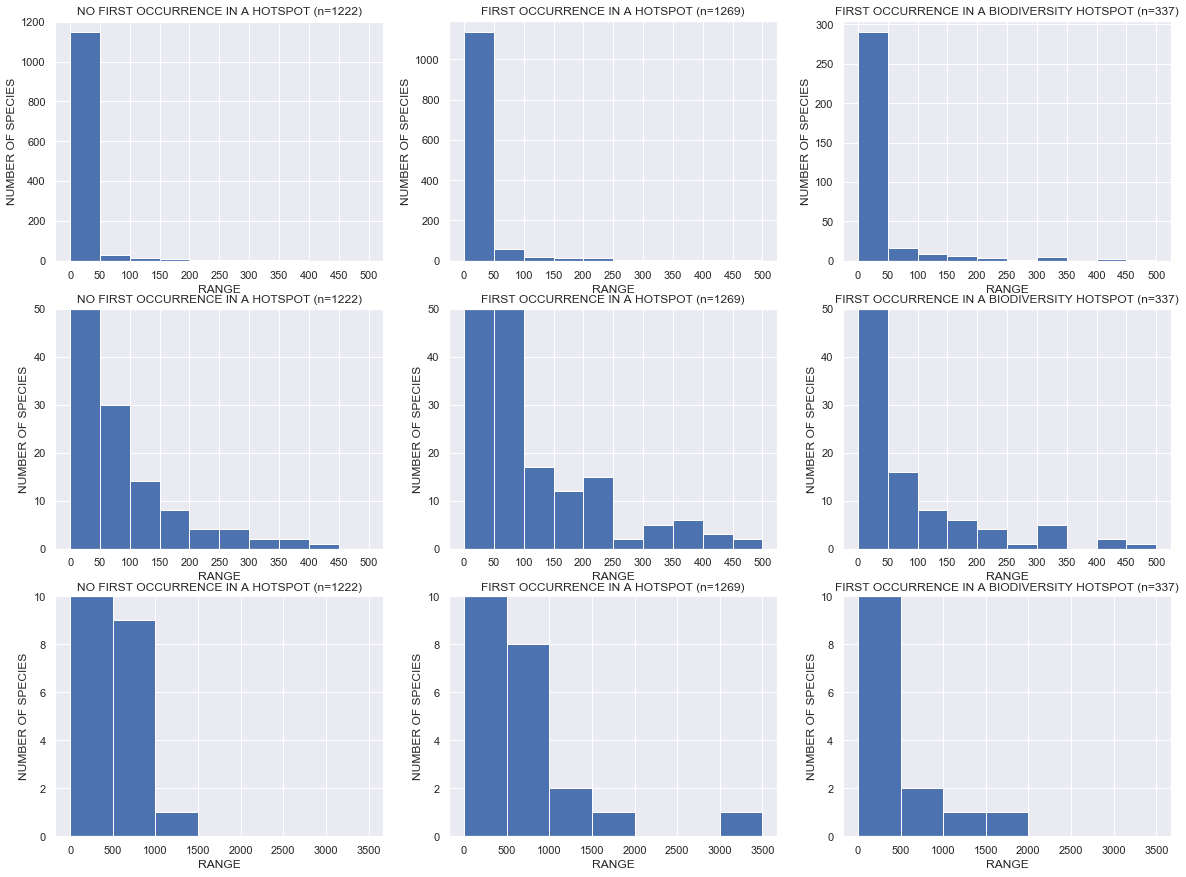

In [35]:
fig, ax = plt.subplots(3,3,figsize=(20,15))

x = np.linspace(0,500,11)

i = 0
j = 0
ax[i,j].hist(speciesRangeHull.loc[speciesLifespan['FIRST OCCURRENCE IN HOTSPOT']=='no'].mean(axis=1), bins=x)
ax[i,j].set_xlabel('RANGE')
ax[i,j].set_ylabel('NUMBER OF SPECIES')
ax[i,j].set_title('NO FIRST OCCURRENCE IN A HOTSPOT (n=' +\
        str(speciesRangeHull.loc[speciesLifespan['FIRST OCCURRENCE IN HOTSPOT']=='no'].shape[0]) +')')
ax[i,j].set_xticks(x)

i = 0
j = 1
ax[i,j].hist(speciesRangeHull.loc[speciesLifespan['FIRST OCCURRENCE IN HOTSPOT']=='yes'].mean(axis=1), bins=x)
ax[i,j].set_xlabel('RANGE')
ax[i,j].set_ylabel('NUMBER OF SPECIES')
ax[i,j].set_title('FIRST OCCURRENCE IN A HOTSPOT (n=' +\
    str(speciesRangeHull.loc[speciesLifespan['FIRST OCCURRENCE IN HOTSPOT']=='yes'].shape[0]) +')')
ax[i,j].set_xticks(x)

i = 0
j = 2
ax[i,j].hist(speciesRangeHull.loc[speciesLifespan['FIRST OCCURRENCE IN BIODIVERSITY HOTSPOT']=='yes'].mean(axis=1),\
       bins=x)
ax[i,j].set_xlabel('RANGE')
ax[i,j].set_ylabel('NUMBER OF SPECIES')
ax[i,j].set_title('FIRST OCCURRENCE IN A BIODIVERSITY HOTSPOT (n=' +\
        str(speciesRangeHull.loc[speciesLifespan['FIRST OCCURRENCE IN BIODIVERSITY HOTSPOT']=='yes'].shape[0]) +')')
ax[i,j].set_xticks(x)

x = np.linspace(0,500,11)

i = 1
j = 0
ax[i,j].hist(speciesRangeHull.loc[speciesLifespan['FIRST OCCURRENCE IN HOTSPOT']=='no'].mean(axis=1), bins=x)
ax[i,j].set_xlabel('RANGE')
ax[i,j].set_ylabel('NUMBER OF SPECIES')
ax[i,j].set_title('NO FIRST OCCURRENCE IN A HOTSPOT (n=' +\
        str(speciesRangeHull.loc[speciesLifespan['FIRST OCCURRENCE IN HOTSPOT']=='no'].shape[0]) +')')
ax[i,j].set_ylim([0,50])
ax[i,j].set_xticks(x)

i = 1
j = 1
ax[i,j].hist(speciesRangeHull.loc[speciesLifespan['FIRST OCCURRENCE IN HOTSPOT']=='yes'].mean(axis=1), bins=x)
ax[i,j].set_xlabel('RANGE')
ax[i,j].set_ylabel('NUMBER OF SPECIES')
ax[i,j].set_title('FIRST OCCURRENCE IN A HOTSPOT (n=' +\
    str(speciesRangeHull.loc[speciesLifespan['FIRST OCCURRENCE IN HOTSPOT']=='yes'].shape[0]) +')')
ax[i,j].set_ylim([0,50])
ax[i,j].set_xticks(x)

i = 1
j = 2
ax[i,j].hist(speciesRangeHull.loc[speciesLifespan['FIRST OCCURRENCE IN BIODIVERSITY HOTSPOT']=='yes'].mean(axis=1),\
       bins=x)
ax[i,j].set_xlabel('RANGE')
ax[i,j].set_ylabel('NUMBER OF SPECIES')
ax[i,j].set_title('FIRST OCCURRENCE IN A BIODIVERSITY HOTSPOT (n=' +\
        str(speciesRangeHull.loc[speciesLifespan['FIRST OCCURRENCE IN BIODIVERSITY HOTSPOT']=='yes'].shape[0]) +')')
ax[i,j].set_ylim([0,50])
ax[i,j].set_xticks(x)

x = np.linspace(0,3500,8)

i = 2
j = 0
ax[i,j].hist(speciesRangeHull.loc[speciesLifespan['FIRST OCCURRENCE IN HOTSPOT']=='no'].mean(axis=1), bins=x)
ax[i,j].set_xlabel('RANGE')
ax[i,j].set_ylabel('NUMBER OF SPECIES')
ax[i,j].set_title('NO FIRST OCCURRENCE IN A HOTSPOT (n=' +\
        str(speciesRangeHull.loc[speciesLifespan['FIRST OCCURRENCE IN HOTSPOT']=='no'].shape[0]) +')')
ax[i,j].set_ylim([0,10])
ax[i,j].set_xticks(x)

i = 2
j = 1
ax[i,j].hist(speciesRangeHull.loc[speciesLifespan['FIRST OCCURRENCE IN HOTSPOT']=='yes'].mean(axis=1), bins=x)
ax[i,j].set_xlabel('RANGE')
ax[i,j].set_ylabel('NUMBER OF SPECIES')
ax[i,j].set_title('FIRST OCCURRENCE IN A HOTSPOT (n=' +\
    str(speciesRangeHull.loc[speciesLifespan['FIRST OCCURRENCE IN HOTSPOT']=='yes'].shape[0]) +')')
ax[i,j].set_ylim([0,10])
ax[i,j].set_xticks(x)

i = 2
j = 2
ax[i,j].hist(speciesRangeHull.loc[speciesLifespan['FIRST OCCURRENCE IN BIODIVERSITY HOTSPOT']=='yes'].mean(axis=1),\
       bins=x)
ax[i,j].set_xlabel('RANGE')
ax[i,j].set_ylabel('NUMBER OF SPECIES')
ax[i,j].set_title('FIRST OCCURRENCE IN A BIODIVERSITY HOTSPOT (n=' +\
        str(speciesRangeHull.loc[speciesLifespan['FIRST OCCURRENCE IN BIODIVERSITY HOTSPOT']=='yes'].shape[0]) +')')
ax[i,j].set_ylim([0,10])
ax[i,j].set_xticks(x)

plt.show()

In [36]:
print('speciesRangeBox')
print('Average range of species that do not have a first occurrence in a hotspot: ' \
      + str(speciesRangeBox.loc[speciesLifespan['FIRST OCCURRENCE IN HOTSPOT']=='no'].mean(axis=1).mean()) + '.')
print('Average range of species that have a first occurrence in a hotspot: ' \
      + str(speciesRangeBox.loc[speciesLifespan['FIRST OCCURRENCE IN HOTSPOT']=='yes'].mean(axis=1).mean()) + '.')
print('Average range of species that have a first occurrence in a biodiversity hotspot: ' \
      + str(speciesRangeBox.loc[speciesLifespan['FIRST OCCURRENCE IN BIODIVERSITY HOTSPOT']=='yes'].mean(axis=1).mean()) \
      + '.')

speciesRangeBox
Average range of species that do not have a first occurrence in a hotspot: 47.275826047435.
Average range of species that have a first occurrence in a hotspot: 76.56167010950863.
Average range of species that have a first occurrence in a biodiversity hotspot: 104.45798386310717.


In [37]:
print('speciesRangeHull: remove singletons')
print('Average range of species that do not have a first occurrence in a hotspot: ' \
      + str(speciesRangeHull.loc[(speciesLifespan['FIRST OCCURRENCE IN HOTSPOT']=='no') & \
                                     (speciesLifespan['LIFESPAN (time units)']>1)].mean(axis=1).mean()) + '.')
print('Average range of species that have a first occurrence in a hotspot: ' \
      + str(speciesRangeHull.loc[(speciesLifespan['FIRST OCCURRENCE IN HOTSPOT']=='yes') & \
                                     (speciesLifespan['LIFESPAN (time units)']>1)].mean(axis=1).mean()) + '.')
print('Average range of species that have a first occurrence in a biodiversity hotspot: ' \
      + str(speciesRangeHull.loc[(speciesLifespan['FIRST OCCURRENCE IN BIODIVERSITY HOTSPOT']=='yes') & \
                                     (speciesLifespan['LIFESPAN (time units)']>1)].mean(axis=1).mean()) + '.')

speciesRangeHull: remove singletons
Average range of species that do not have a first occurrence in a hotspot: 31.240019657105556.
Average range of species that have a first occurrence in a hotspot: 45.559222667635076.
Average range of species that have a first occurrence in a biodiversity hotspot: 47.37672298716313.


## LAST OCCURRENCES

In [38]:
# ADD INFO FOR EACH SPECIES ON THEIR OCCURRENCES IN HOTSPOTS
for timeUnit in timeUnits[1:-1]:
    # determine hotspots and hot spot species
    hotspots = localityFeatures[(localityFeatures['TIMEUNIT']==timeUnit) & \
                                (localityFeatures['SIGNIFICANCE LAST']<0.05)]
    hotspot_species = set(df.loc[df['LIDNUM'].isin(hotspots.index),'ID'].unique())
    hotspot_species = hotspot_species.intersection(allowed_species)
    biodiversity_hotspots = localityFeatures[(localityFeatures['TIMEUNIT']==timeUnit) & \
                     (localityFeatures['SIGNIFICANCE LAST']<0.05) & (localityFeatures['SIGNIFICANCE FIRST']>0.95)]
    biodiversity_hotspot_species = set(df.loc[df['LIDNUM'].isin(biodiversity_hotspots.index),'ID'].unique())
    biodiversity_hotspot_species = biodiversity_hotspot_species.intersection(allowed_species)
    
    # determine info on last occurrences
    last_occurring_species = speciesLastOccurrence.loc[speciesLastOccurrence[timeUnit]==1].index
    species_with_last_occurrence_in_hotspot = hotspot_species.intersection(last_occurring_species)
    species_with_last_occurrence_in_biodiversity_hotspot = \
                biodiversity_hotspot_species.intersection(last_occurring_species)
    
    # import info to speciesLifespan dataframe
    speciesLifespan.loc[species_with_last_occurrence_in_hotspot,'LAST OCCURRENCE IN HOTSPOT'] = 'yes'
    speciesLifespan.loc[species_with_last_occurrence_in_biodiversity_hotspot,\
                        'LAST OCCURRENCE IN BIODIVERSITY HOTSPOT'] = 'yes'    

speciesLifespan.loc[speciesLifespan['LAST OCCURRENCE IN HOTSPOT'].isnull(), 'LAST OCCURRENCE IN HOTSPOT'] = 'no'
speciesLifespan.loc[speciesLifespan['LAST OCCURRENCE IN BIODIVERSITY HOTSPOT'].isnull(), \
                    'LAST OCCURRENCE IN BIODIVERSITY HOTSPOT'] = 'no'

speciesLifespan.head()

,GENUS,SPECIES,LIFESPAN (time units),LIFESPAN (My),FIRST OCCURRENCE IN HOTSPOT,ANY OCCURRENCE IN HOTSPOT,FIRST OCCURRENCE IN BIODIVERSITY HOTSPOT,ANY OCCURRENCE IN BIODIVERSITY HOTSPOT,OLD OCCURRENCE (ONLY) IN HOTSPOT,OLD OCCURRENCE (ONLY) IN BIODIVERSITY HOTSPOT,LAST OCCURRENCE IN HOTSPOT,LAST OCCURRENCE IN BIODIVERSITY HOTSPOT
24,Heteroxerus,grivensis,10,15.4,no,yes,no,yes,yes,yes,no,no
53,Vasseuromys,bacchius,5,8.8,no,yes,no,no,yes,no,no,no
523,Piezodus,tomerdingensis,2,3.5,no,yes,no,yes,yes,yes,yes,no
609,Steneofiber,eseri,10,15.4,no,yes,no,yes,yes,yes,no,no
815,Vasseuromys,autolensis,2,3.5,no,yes,no,no,yes,no,yes,no


In [39]:
print('Average lifespan of species that do not have a last occurrence in a hotspot: ' \
      + str(speciesLifespan.loc[speciesLifespan['LAST OCCURRENCE IN HOTSPOT']=='no',\
        'LIFESPAN (time units)'].mean()) + ' time units.')
print('Average lifespan of species that have a last occurrence in a hotspot: ' \
      + str(speciesLifespan.loc[speciesLifespan['LAST OCCURRENCE IN HOTSPOT']=='yes',\
        'LIFESPAN (time units)'].mean()) + ' time units.')
print('Average lifespan of species that have a last occurrence in a biodiversity hotspot: ' \
      + str(speciesLifespan.loc[speciesLifespan['LAST OCCURRENCE IN BIODIVERSITY HOTSPOT']=='yes',\
        'LIFESPAN (time units)'].mean()) + ' time units.')
print()

print('Average lifespan of species that do not have a last occurrence in a hotspot: ' \
      + str(speciesLifespan.loc[speciesLifespan['LAST OCCURRENCE IN HOTSPOT']=='no',\
        'LIFESPAN (My)'].mean()) + ' million years.')
print('Average lifespan of species that have a last occurrence in a hotspot: ' \
      + str(speciesLifespan.loc[speciesLifespan['LAST OCCURRENCE IN HOTSPOT']=='yes',\
        'LIFESPAN (My)'].mean()) + ' million years.')
print('Average lifespan of species that have a last occurrence in a biodiversity hotspot: ' \
      + str(speciesLifespan.loc[speciesLifespan['LAST OCCURRENCE IN BIODIVERSITY HOTSPOT']=='yes',\
        'LIFESPAN (My)'].mean()) + ' million years.')

Average lifespan of species that do not have a last occurrence in a hotspot: 2.327932098765432 time units.
Average lifespan of species that have a last occurrence in a hotspot: 2.3188284518828453 time units.
Average lifespan of species that have a last occurrence in a biodiversity hotspot: 2.911694510739857 time units.

Average lifespan of species that do not have a last occurrence in a hotspot: 3.0447453703703977 million years.
Average lifespan of species that have a last occurrence in a hotspot: 2.9343849372385153 million years.
Average lifespan of species that have a last occurrence in a biodiversity hotspot: 3.2654653937947518 million years.


In [40]:
print('SINGLETONS REMOVED')
print()
print('Average lifespan of species that do not have a last occurrence in a hotspot: ' \
      + str(speciesLifespan.loc[(speciesLifespan['LAST OCCURRENCE IN HOTSPOT']=='no') & \
         (speciesLifespan['LIFESPAN (time units)']>1), 'LIFESPAN (time units)'].mean()) + ' time units.')
print('Average lifespan of species that have a last occurrence in a hotspot: ' \
      + str(speciesLifespan.loc[(speciesLifespan['LAST OCCURRENCE IN HOTSPOT']=='yes') & \
         (speciesLifespan['LIFESPAN (time units)']>1), 'LIFESPAN (time units)'].mean()) + ' time units.')
print('Average lifespan of species that have a last occurrence in a biodiversity hotspot: ' \
      + str(speciesLifespan.loc[(speciesLifespan['LAST OCCURRENCE IN BIODIVERSITY HOTSPOT']=='yes') & \
         (speciesLifespan['LIFESPAN (time units)']>1), 'LIFESPAN (time units)'].mean()) + ' time units.')
print()

print('Average lifespan of species that do not have a last occurrence in a hotspot: ' \
      + str(speciesLifespan.loc[(speciesLifespan['LAST OCCURRENCE IN HOTSPOT']=='no') & \
         (speciesLifespan['LIFESPAN (time units)']>1), 'LIFESPAN (My)'].mean()) + ' million years.')
print('Average lifespan of species that have a last occurrence in a hotspot: ' \
      + str(speciesLifespan.loc[(speciesLifespan['LAST OCCURRENCE IN HOTSPOT']=='yes') & \
         (speciesLifespan['LIFESPAN (time units)']>1), 'LIFESPAN (My)'].mean()) + ' million years.')
print('Average lifespan of species that have a last occurrence in a biodiversity hotspot: ' \
      + str(speciesLifespan.loc[(speciesLifespan['LAST OCCURRENCE IN BIODIVERSITY HOTSPOT']=='yes') & \
         (speciesLifespan['LIFESPAN (time units)']>1), 'LIFESPAN (My)'].mean()) + ' million years.')

SINGLETONS REMOVED

Average lifespan of species that do not have a last occurrence in a hotspot: 3.5572065378900444 time units.
Average lifespan of species that have a last occurrence in a hotspot: 3.4779874213836477 time units.
Average lifespan of species that have a last occurrence in a biodiversity hotspot: 3.592233009708738 time units.

Average lifespan of species that do not have a last occurrence in a hotspot: 4.667176820208026 million years.
Average lifespan of species that have a last occurrence in a hotspot: 4.222248427672919 million years.
Average lifespan of species that have a last occurrence in a biodiversity hotspot: 4.010550161812319 million years.


In [41]:
print('speciesRangeHull:')
print('Average range of species that do not have a last occurrence in a hotspot: ' \
      + str(speciesRangeHull.loc[speciesLifespan['LAST OCCURRENCE IN HOTSPOT']=='no'].mean(axis=1).mean()) + '.')
print('Average range of species that have a last occurrence in a hotspot: ' \
      + str(speciesRangeHull.loc[speciesLifespan['LAST OCCURRENCE IN HOTSPOT']=='yes'].mean(axis=1).mean()) + '.')
print('Average range of species that have a last occurrence in a biodiversity hotspot: ' \
      + str(speciesRangeHull.loc[speciesLifespan['LAST OCCURRENCE IN BIODIVERSITY HOTSPOT']=='yes']\
            .mean(axis=1).mean()) + '.')

speciesRangeHull:
Average range of species that do not have a last occurrence in a hotspot: 17.72063657207237.
Average range of species that have a last occurrence in a hotspot: 27.515353197472738.
Average range of species that have a last occurrence in a biodiversity hotspot: 54.65059286012289.


In [42]:
print('speciesRangeHull: remove singletons')
print('Average range of species that do not have a last occurrence in a hotspot: ' \
      + str(speciesRangeHull.loc[(speciesLifespan['LAST OCCURRENCE IN HOTSPOT']=='no') & \
                                     (speciesLifespan['LIFESPAN (time units)']>1)].mean(axis=1).mean()) + '.')
print('Average range of species that have a last occurrence in a hotspot: ' \
      + str(speciesRangeHull.loc[(speciesLifespan['LAST OCCURRENCE IN HOTSPOT']=='yes') & \
                                     (speciesLifespan['LIFESPAN (time units)']>1)].mean(axis=1).mean()) + '.')
print('Average range of species that have a last occurrence in a biodiversity hotspot: ' \
      + str(speciesRangeHull.loc[(speciesLifespan['LAST OCCURRENCE IN BIODIVERSITY HOTSPOT']=='yes') & \
                                     (speciesLifespan['LIFESPAN (time units)']>1)].mean(axis=1).mean()) + '.')

speciesRangeHull: remove singletons
Average range of species that do not have a last occurrence in a hotspot: 33.14836973243328.
Average range of species that have a last occurrence in a hotspot: 46.399189934367286.
Average range of species that have a last occurrence in a biodiversity hotspot: 66.92027785330657.
